# Interactive Plotting and Monte Carlo simulations of CPPI

In [30]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## GBM Interactive Plots

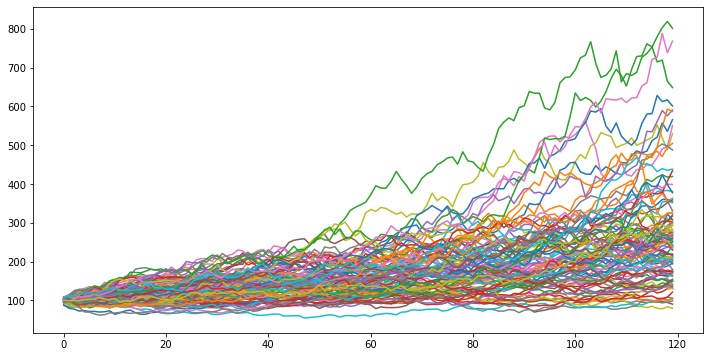

In [4]:
erk.gbm(10, 100, mu=0.1).plot(legend=False, figsize=(12,6))

In [15]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution uner a Geometric Brownian Motion model
    """
    s_0 = 100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color='indianred', alpha=0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=s_0, ls=':', color='black')
    ax.set_ylim(top=400)
    # draw a dot at the origin
    ax.plot(0, s_0, marker='o', color='darkred', alpha=0.2)

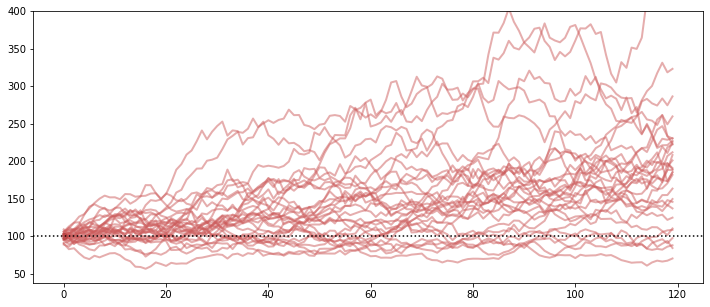

In [16]:
show_gbm(30, 0.07, 0.15)

In [18]:
gbm_controls = widgets.interactive(show_gbm, 
                                   n_scenarios=(1, 20, 1),
                                   mu=(-0.2, 0.2, 0.01),
                                   sigma=(0, .3, 0.01)
                                  )

In [19]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

## Interactive CPPI Simulation - Monte Carlo

In [21]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr['Wealth']
    y_max = wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha=0.3, color='indianred', figsize=(12,6))
    ax.axhline(y=start, ls=':', color='black')
    ax.axhline(y=start*floor, ls='--', color='red')
    ax.set_ylim(top=y_max)

cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, 0.01),
                                    sigma=(0, .30, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description='Zoom Y Axis')
                                   )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [23]:
import matplotlib.pyplot as plt

In [24]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr['Wealth']
    # calculate terminal wealth stats
    y_max = wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color='indianred')
    wealth_ax.axhline(y=start, ls=':', color='black')
    wealth_ax.axhline(y=start*floor, ls='--', color='red')
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=':', color='black')

cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, 0.01),
                                    sigma=(0, .30, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description='Zoom Y Axis')
                                   )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [43]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, steps_per_year=12, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=steps_per_year)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr['Wealth']
    
    # calculate terminal wealth stats
    y_max = wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios
    
    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0
    
    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color='indianred')
    wealth_ax.axhline(y=start, ls=':', color='black')
    wealth_ax.axhline(y=start*floor, ls='--', color='red')
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=':', color='black')
    hist_ax.axhline(y=tw_mean, ls=':', color='blue')
    hist_ax.axhline(y=tw_median, ls=':', color='purple')
    hist_ax.annotate(f'Mean: ${int(tw_mean)}', xy=(.7, .9), xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f'Median: ${int(tw_median)}', xy=(.7, .85), xycoords='axes fraction', fontsize=24)
    if floor > 0.01:
        hist_ax.axhline(y=start*floor, ls='--', color='red', linewidth=3)
        hist_ax.annotate(f'Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:.2f})', xy=(.7, .73), xycoords='axes fraction', fontsize=24)
    

cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, 0.01),
                                    sigma=(0, .50, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                    steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12, description='Rebals/Year'),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description='Zoom Y Axis')
                                   )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…